In [30]:
import os

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

# Set Matplotlib SVG text to True
plt.rcParams['svg.fonttype'] = 'none'

In [45]:
# Loading the file
file_loc_10mhz_led = os.path.join('Data', 'Oscilloscope', 'LED 10MHz.csv')

# Reading the file
df_10mhz_led = pd.read_csv(file_loc_10mhz_led)

# As teh zero line on oscilloscope is not at 0V, we need to shift the data
df_10mhz_led['CH1(V) shift'] = df_10mhz_led['CH1(V)'] + abs(df_10mhz_led['CH1(V)'].min())
df_10mhz_led['CH3(V) shift'] = df_10mhz_led['CH3(V)'] + abs(df_10mhz_led['CH3(V)'].min())

# Display the dataframe
print(df_10mhz_led)

       Time(s)    CH1(V)    CH3(V)  CH1(V) shift  CH3(V) shift
0     0.000001  1.795442  0.013914      5.161895      0.019131
1     0.000001  1.795442  0.014783      5.161895      0.020001
2     0.000001  1.571011  0.014783      4.937464      0.020001
3     0.000001  1.571011  0.015653      4.937464      0.020870
4     0.000001  1.346581  0.015653      4.713034      0.020870
...        ...       ...       ...           ...           ...
3995  0.000002  2.693162  0.006087      6.059615      0.011305
3996  0.000002  2.693162  0.006087      6.059615      0.011305
3997  0.000002  2.917593  0.006957      6.284046      0.012174
3998  0.000002  2.917593  0.006957      6.284046      0.012174
3999  0.000002  2.917593  0.006087      6.284046      0.011305

[4000 rows x 5 columns]


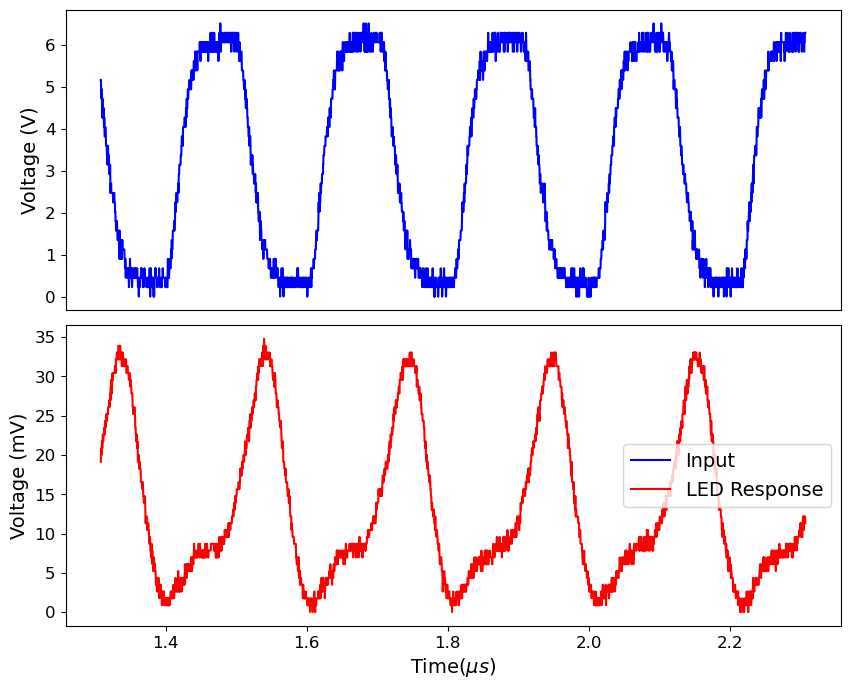

In [46]:
# Plotting the data
fig= plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(211)
ax1.plot(df_10mhz_led['Time(s)']/1e-6, df_10mhz_led['CH1(V) shift'], color='blue', label='Input')
ax1.tick_params(axis='both', which='major', labelsize=12)
plt.setp(ax1.get_xticklabels(), visible=False) # Hide the x-axis ticklabloe
ax1.tick_params(axis='x', which='both', bottom=False, top=False) # Hide the x-axis ticks
ax1.set_ylabel('Voltage (V)', size = 14)

# Move both the subplots closer
plt.subplots_adjust(hspace=0.05)

ax2 = fig.add_subplot(212)
ax2.plot(df_10mhz_led['Time(s)']/1e-6, df_10mhz_led['CH3(V) shift']/1e-3, color='red', label='LED Response')
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xlabel(r'Time($\mu s$)', size = 14)
ax2.set_ylabel('Voltage (mV)', size = 14)

# Create a combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best', fontsize=14)

# Save the Plots
plt.savefig('Plots/Oscilloscope/LED_10MHz.png', dpi=800, transparent=True, bbox_inches='tight')
plt.savefig('Plots/Oscilloscope/LED_10MHz.pdf', transparent=True, bbox_inches='tight')
plt.savefig('Plots/Oscilloscope/LED_10MHz.svg', transparent=True, bbox_inches='tight')

plt.show()